<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2">Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.0.1">Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.0.2">Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.0.3">Логистическая регрессия</a></span></li><li><span><a href="#Оценка-accuracy,-precision-и-recall,-F-метрикa." data-toc-modified-id="Оценка-accuracy,-precision-и-recall,-F-метрикa.-2.0.4">Оценка accuracy, precision и recall, F-метрикa.</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3">Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.0.1">Взвешивание классов</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.0.2">Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.0.3">Увеличение выборки</a></span></li><li><span><a href="#ROC-кривая-и-AUC-ROC-для-посленнего-измененного-баланса." data-toc-modified-id="ROC-кривая-и-AUC-ROC-для-посленнего-измененного-баланса.-3.0.4">ROC-кривая и AUC-ROC для посленнего измененного баланса.</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4">Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span><ul class="toc-item"><li><span><a href="#Итог:" data-toc-modified-id="Итог:-4.1.1">Итог:</a></span></li></ul></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler 

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
def rewiev(row):
    print('info')
    display(row.info())
    print('----------------------------------------------------')
    print('head')
    display(row.head(10))
    print('----------------------------------------------------')
    print('isna')      
    display(row.isna().sum())
    print('----------------------------------------------------')
    print('isna%')      
    display(row.isna().sum()/len(row))
    print('----------------------------------------------------')
    print('describe')      
    display(row.describe())
    print('----------------------------------------------------')
    return

In [4]:
rewiev(df)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

----------------------------------------------------
head


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


----------------------------------------------------
isna


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

----------------------------------------------------
isna%


RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

----------------------------------------------------
describe


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


----------------------------------------------------


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df[df['tenure'].isna()==True]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


В колонке Tenure есть пропуски и их 9.09% так как в колонке хранятся данные о том сколько лет человек является клиентом банка, что может повлиять на итоги исследования, можно было бы предположить что это 0, но 0 так же присутствыет в колонке, придется эти строки удалить.

In [7]:
#df = (df.dropna(subset=['tenure'])).reset_index(drop=True)
df = df.fillna(-1)

In [8]:
df['tenure'].value_counts()

 1.0     952
 2.0     950
 8.0     933
 3.0     928
 5.0     927
 7.0     925
-1.0     909
 4.0     885
 9.0     882
 6.0     881
 10.0    446
 0.0     382
Name: tenure, dtype: int64

In [9]:
df['tenure'] = df['tenure'].astype(object)

In [10]:
df.duplicated().sum()

0

Дубликатов нет

rownumber - лишняя колонка дублирующая индекс, как признак она не нужна.

customerid - уникальный идентификатор клиента, для текущей задачи не нужен

surname - фамилия клиента, для текужей задачи не нужна.



In [11]:
data = df.drop(['rownumber','customerid','surname'],axis=1)

In [12]:
data = pd.get_dummies(data, drop_first=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   balance            10000 non-null  float64
 3   numofproducts      10000 non-null  int64  
 4   hascrcard          10000 non-null  int64  
 5   isactivemember     10000 non-null  int64  
 6   estimatedsalary    10000 non-null  float64
 7   exited             10000 non-null  int64  
 8   geography_Germany  10000 non-null  uint8  
 9   geography_Spain    10000 non-null  uint8  
 10  gender_Male        10000 non-null  uint8  
 11  tenure_0.0         10000 non-null  uint8  
 12  tenure_1.0         10000 non-null  uint8  
 13  tenure_2.0         10000 non-null  uint8  
 14  tenure_3.0         10000 non-null  uint8  
 15  tenure_4.0         10000 non-null  uint8  
 16  tenure_5.0         1000

,creditscore,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,...,tenure_1.0,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0
0,619,42,0.00,1,1,1,101348.88,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,1,0,96270.64,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9996,516,35,57369.61,1,1,1,101699.77,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,709,36,0.00,1,0,1,42085.58,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9998,772,42,75075.31,2,1,0,92888.52,1,1,0,...,0,0,1,0,0,0,0,0,0,0


Данные готовы к исследованию

## Исследование задачи

Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

In [13]:
target = data['exited']
features = data.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=12345)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 21) (2000, 21) (2000, 21)
(6000,) (2000,) (2000,)


In [14]:
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary']

In [15]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [16]:
target.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Дирсбаланс классов в соотношении 1:3.9

#### Решающее дерево

In [17]:
best_depth_dtc = 0
best_result_dtc = 0
for depth in tqdm(range(2, 30)):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result_dtc:
        best_depth_dtc = depth
        best_result_dtc = result
print('Best depth', best_depth_dtc,'F1-score', best_result_dtc)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 30.86it/s]

Best depth 6 F1-score 0.5705614567526556


Лучший результат получаем при глубине 6

#### Случайный лес

In [18]:
best_est_rfc = 0
best_depth_rfc = 0
best_result_rfc = 0

for depth in tqdm(range(1, 22, 2)):    
    for estimator in range(100, 1001, 100):
        model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth = depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rfc:
            best_depth_rfc = depth
            best_est_rfc = estimator
            best_result_rfc = result
print('N estimators', best_est_rfc,'Depth',best_depth_rfc,'F1-score', best_result_rfc)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:46<00:00, 31.49s/it]

N estimators 100 Depth 17 F1-score 0.5921450151057401


Лучшие результат при N estimators = 100 Depth = 17

In [19]:
for depth in tqdm(range(1, 22, 2)):
    for estimator in range(10, 120, 1):
        model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rfc:
            best_est_rfc = estimator
            best_depth_rfc = depth
            best_result_rfc = result
print('N estimators', best_est_rfc,'Depth',best_depth_rfc,'F1-score', best_result_rfc)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [07:24<00:00, 40.38s/it]

N estimators 49 Depth 21 F1-score 0.5985185185185184


Лучший результат при n_estimators = 49 Depth = 21

#### Логистическая регрессия

In [20]:
model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.32830820770519265


Низкий результат

#### Оценка accuracy, precision и recall, F-метрикa.

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность 0.8585
Precision 0.7800829875518672
Recall 0.44976076555023925
F1 0.5705614567526556

Случайный лес
Точность 0.8645
Precision 0.7859922178988327
Recall 0.48325358851674644
F1 0.5985185185185184

Логистическая регрессия
Точность 0.7995
Precision 0.547486033519553
Recall 0.23444976076555024
F1 0.32830820770519265



AUC-ROC DecisionTreeClassifier 0.8195874339912533
AUC-ROC RandomForestClassifier 0.8398686781313702
AUC-ROC LogisticRegression 0.759840066779983


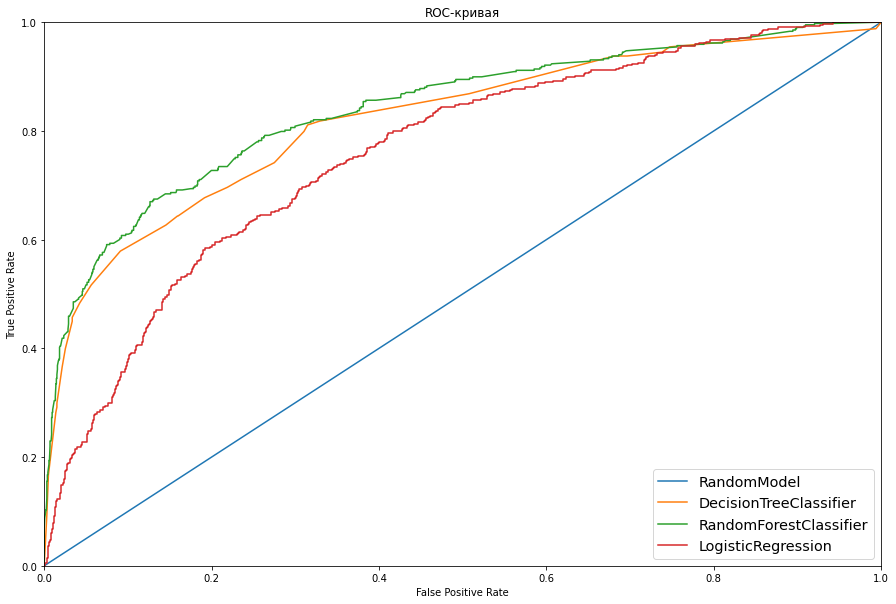

In [22]:
plt.figure(figsize=[15,10])

plt.plot([0, 1], [0, 1], linestyle='-', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

По полученным данным делаем вывод что RandomForestClassifier лучше по F1 и AUC-ROC

## Борьба с дисбалансом

#### Взвешивание классов

In [23]:
'''
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

'''
best_depth_dtc_b = 0
best_result_dtc_b = 0
for depth in tqdm(range(2, 30)):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth,class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result_dtc_b:
        best_depth_dtc_b = depth
        best_result_dtc_b = result
print('Best depth', best_depth_dtc_b,'F1-score', best_result_dtc_b)
print('Решающее дерево')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 30.73it/s]

Best depth 5 F1-score 0.5948827292110873
Решающее дерево
Точность 0.785
Precision 0.48598130841121495
Recall 0.49760765550239233
F1 0.49172576832151305



In [24]:
'''
model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
'''
best_est_rfc_b = 0
best_depth_rfc_b = 0
best_result_rfc_b = 0
for depth in tqdm(range(1, 22, 2)):    
    for estimator in range(100, 1001, 100):
        model =  RandomForestClassifier(random_state=12345, n_estimators=estimator,max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rfc_b:
            best_depth_rfc_b = depth
            best_est_rfc_b = estimator
            best_result_rfc_b = result
print('N estimators', best_est_rfc_b,'Depth',best_depth_rfc_b,'F1-score', best_result_rfc_b)
print('Случайный лес')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:42<00:00, 31.11s/it]

N estimators 500 Depth 9 F1-score 0.6403607666290869
Случайный лес
Точность 0.8615
Precision 0.8
Recall 0.44976076555023925
F1 0.5758039816232772



In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Логистическая регрессия
Точность 0.7045
Precision 0.38294993234100133
Recall 0.6770334928229665
F1 0.4891961970613656



F1-мера выросла у Логистической регресии,у Решающего дерева и Случайного леса снизилась, по сравнеию с дисбалансными данными.

Лучшей моделью себя показал Случайный лес по F1-мере.

#### Уменьшение выборки

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: exited, dtype: int64


In [27]:
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность 0.776
Precision 0.47641509433962265
Recall 0.7248803827751196
F1 0.5749525616698292

Случайный лес
Точность 0.766
Precision 0.46279761904761907
Recall 0.7440191387559809
F1 0.5706422018348625

Логистическая регрессия
Точность 0.6995
Precision 0.37718120805369126
Recall 0.6722488038277512
F1 0.48323301805674973



F1-мера так же выросла у Логистической регресии, по сравнеию с дисбалансными данными.

Лучшей моделью себя показал Случайный лес по F1-мере.

#### Увеличение выборки

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: exited, dtype: int64


In [29]:
model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность 0.768
Precision 0.46417445482866043
Recall 0.7129186602870813
F1 0.5622641509433962

Случайный лес
Точность 0.853
Precision 0.6823529411764706
Recall 0.5550239234449761
F1 0.612137203166227

Логистическая регрессия
Точность 0.7045
Precision 0.38294993234100133
Recall 0.6770334928229665
F1 0.4891961970613656



F1-мера выросла у Логистической регресси по сравнению с дисбалансными данными.

Лучшей моделью по F1-мере стал Случайный лес.

#### ROC-кривая и AUC-ROC для посленнего измененного баланса.

AUC-ROC DecisionTreeClassifier 0.8070608943920541
AUC-ROC RandomForestClassifier 0.8331884114953515
AUC-ROC LogisticRegression 0.764313236833032


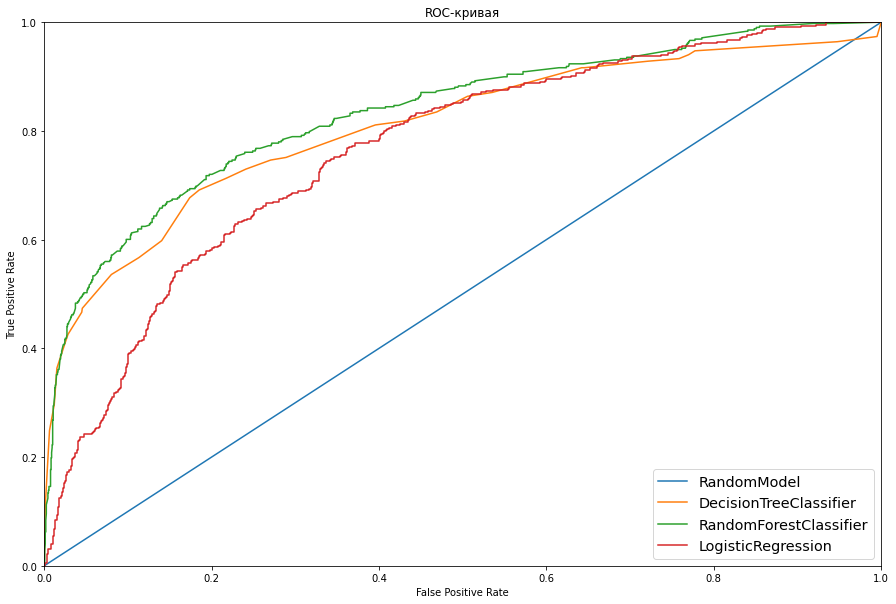

In [30]:
plt.figure(figsize=[15,10])

plt.plot([0, 1], [0, 1], linestyle='-', label='RandomModel')


model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_dtc)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Дисбаланс влияет на модели в худшую сторону. 

Лучшим решением стало увеличение классов.

Выравние классов в выборке привело к резкому росту параметра recall и небольшому понижению percison, в среднем F-мера выросла.

## Тестирование модели

К тестовой выборке примем модель случайного леса

In [31]:
'''for estimator in tqdm(range(10, 300, 10)):'''
model =  RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
result = f1_score(target_valid, predicted_valid)
print(result)

#    if result > best_result:
#        best_est = estimator
#        best_result = result
#print('N estimators', best_est,'F1-score', best_result)


0.612137203166227


In [32]:
#model =  RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
#model.fit(features_train, target_train)
#predicted_valid = model.predict(features_valid)
#result = f1_score(target_valid, predicted_valid)
#print(result)

In [33]:
#for estimator in tqdm(range(20, 40, 1)):
#    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
#    model.fit(features_upsampled, target_upsampled)
#    predicted_valid = model.predict(features_valid)
#    result = f1_score(target_valid, predicted_valid)
#    if result > best_result:
#        best_est = estimator
#        best_result = result
#print('N estimators', best_est,'F1-score', best_result)

#Лучший результат по F1 при N estimators = 125

In [34]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов')
print('Точность', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc_b, max_depth=best_depth_rfc_b, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов')
print('Точность', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов')
print('Точность', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов
Точность 0.843
Precision 0.746606334841629
Recall 0.3900709219858156
F1 0.5124223602484472

Случайный лес - взвешенные классы
Точность 0.826
Precision 0.5806451612903226
Recall 0.6382978723404256
F1 0.608108108108108

Случайный лес - уменьшенное количество классов
Точность 0.7605
Precision 0.4583333333333333
Recall 0.7281323877068558
F1 0.5625570776255708

Случайный лес - увеличенное количество классов
Точность 0.8455
Precision 0.6727272727272727
Recall 0.524822695035461
F1 0.5896414342629482



AUC-ROC RandomForestClassifier - disbalanced 0.8427183912956792
AUC-ROC RandomForestClassifier - balanced by class weight 0.8522211278859372
AUC-ROC RandomForestClassifier - balanced by downsampled 0.835381840913486
AUC-ROC RandomForestClassifier - balanced by upsampled 0.8422821558724634


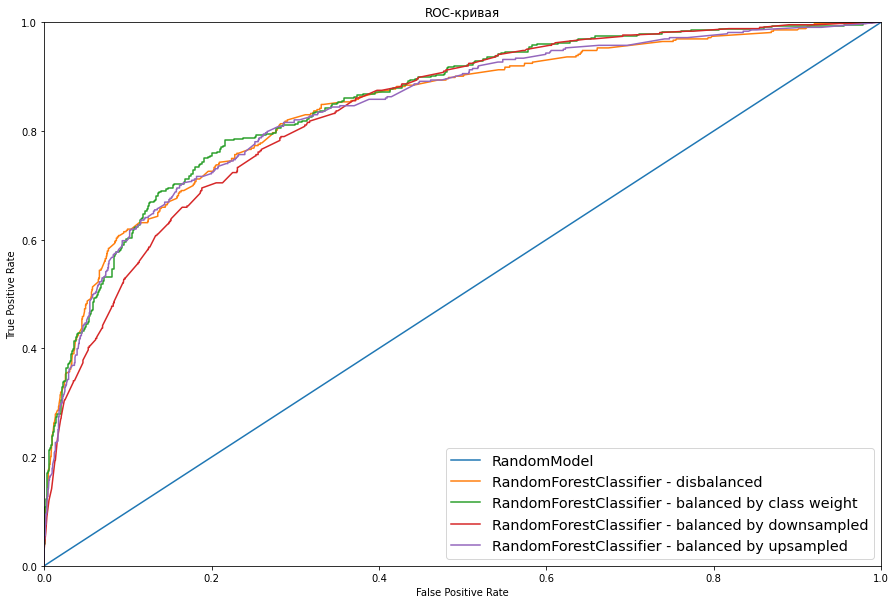

In [35]:
plt.figure(figsize=[15,10])

plt.plot([0, 1], [0, 1], linestyle='-', label='RandomModel')


model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - disbalanced',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc_b, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by class weight',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by class weight')

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by downsampled',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by downsampled')

model = RandomForestClassifier(random_state=12345, n_estimators=best_est_rfc, max_depth=best_depth_rfc)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - balanced by upsampled',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by upsampled')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Вывод

Произведен тест на моделях c дисбалансом классов:

Решающее дерево, Случайный лес, Логистическая регрессия на исходных данных.

Произведен тест на моделях со сбалансированными классами:

Решающее дерево, Случайный лес, Логистическая регрессия с взвешенными классами, уменьшении выборки и увеличении выборки.

#### Итог:

Лучшая модель для предоставленных данных это Случайный лес с взвешенными классами по F1 и AUC-ROC.



